In [5]:
%pylab inline

import cartopy.crs as ccrs
from cartopy.io import srtm
import matplotlib.pyplot as plt

from cartopy.io import PostprocessedRasterSource, LocatedImage
from cartopy.io.srtm import SRTM3Source

Populating the interactive namespace from numpy and matplotlib


In [8]:
# Region of interest


map_extent = [ -120, -118, 33, 35]


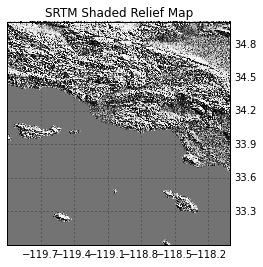

In [14]:
# Shuttle radar shaded relief map etc


def fill_and_shade(located_elevations):
    """
    Given an array of elevations in a LocatedImage, fill any holes in
    the data and add a relief (shadows) to give a realistic 3d appearance.

    """
    new_elevations = srtm.fill_gaps(located_elevations.image, max_distance=15)
    new_img = srtm.add_shading(new_elevations, azimuth=135, altitude=15)
    return LocatedImage(new_img, located_elevations.extent)


ax = plt.axes(projection=ccrs.PlateCarree())

# Define a raster source which uses the SRTM3 data and applies the
# fill_and_shade function when the data is retrieved.
shaded_srtm = PostprocessedRasterSource(SRTM3Source(), fill_and_shade)

# Add the shaded SRTM source to our map with a grayscale colormap.
ax.add_raster(shaded_srtm, cmap='Greys')

# This data is high resolution, so pick a small area which has some
# interesting orography.
ax.set_extent([-120, -118, 33, 35])

plt.title("SRTM Shaded Relief Map")

gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False

plt.show()


In [15]:
help (ax.set_extent)

Help on method set_extent in module cartopy.mpl.geoaxes:

set_extent(self, extents, crs=None) method of cartopy.mpl.geoaxes.GeoAxesSubplot instance
    Set the extent (x0, x1, y0, y1) of the map in the given
    coordinate system.
    
    If no crs is given, the extents' coordinate system will be assumed
    to be the Geodetic version of this axes' projection.



## Google map tiles with cartopy !

For a given lat / lon box, we can download (on demand) map tiles and plot them ... 


In [3]:
from cartopy.io.img_tiles import GoogleTiles

# Specify a region of interest

lat0 =  33  ; lat1 = 34
lon0 =  -120; lon1 = -118

gg_tiles = GoogleTiles()

plt.figure(figsize=(10, 10))


ax = plt.subplot(111, projection=gg_tiles.crs)
ax.set_extent([lon0, lon1, lat0, lat1])
ax.add_image(gg_tiles, 11)

plt.scatter(lon0, lat0, marker=(5, 1), color='red', s=200)
gl = ax.gridlines(draw_labels=True,)
gl.xlabels_top = False
gl.ylabels_left = False

ValueError: A non-empty list of tiles should be provided to merge.

In [ ]:
# plt.figure(figsize=(15, 10))
# ax = plt.subplot(111, projection=ccrs.PlateCarree())

# elev, crs, extent = srtm_composite(12, 47, 1, 1)
# plt.imshow(elev, extent=extent, transform=crs,
#            cmap='gist_earth', origin='lower')
# cb = plt.colorbar(orientation='vertical')
# cb.set_label('Altitude')
# plt.title("SRTM Map")
# gl = ax.gridlines(draw_labels=True,)
# gl.xlabels_top = False
# gl.ylabels_left = False


plt.figure(figsize=(15, 10))
ax = plt.subplot(111, projection=ccrs.PlateCarree())

elev, crs, extent = srtm_composite(lon0, lat0, 1, 1)
elev = np.ma.masked_less_equal(elev,0,copy=False)
plt.imshow(elev, extent=extent, transform=crs,
           cmap='gist_earth', origin='lower')
cb = plt.colorbar(orientation='vertical')
cb.set_label('Altitude')
plt.title("SRTM Map")
gl = ax.gridlines(draw_labels=True,)
gl.xlabels_top = False
gl.ylabels_left = False



In [ ]:
plt.figure(figsize=(15, 10))
ax = plt.subplot(111, projection=ccrs.PlateCarree())

elev, crs, extent = srtm_composite(-120, 33, 4, 4)
elev = np.ma.masked_less_equal(elev, -100, copy=False)

plt.imshow(elev, extent=extent, transform=crs,
           cmap='terrain', origin='lower')
cb = plt.colorbar(orientation='vertical')
cb.set_label('Altitude')
plt.title("SRTM Map")
gl = ax.gridlines(draw_labels=True,)
gl.xlabels_top = False
gl.ylabels_left = False

In [ ]:
# Patching holes in the data by a smoothing / interpolation routine from gdal

elev, crs, extent = srtm_composite(-120, 33, 4, 4)
src_ds = gdal_array.OpenArray(elev)
srcband = src_ds.GetRasterBand(1)
dstband = srcband
maskband = srcband
smoothing_iterations = 0
options = []
max_distance = 0.1
result = gdal.FillNodata(dstband, maskband,
                         max_distance, smoothing_iterations, options,
                         callback=None)
elev = dstband.ReadAsArray()



In [ ]:
# And plotting

plt.figure(figsize=(15, 10))
ax = plt.subplot(111, projection=ccrs.PlateCarree())

plt.imshow(elev, extent=extent, transform=crs, cmap='terrain', origin='lower', vmin=0.0, vmax=4000.0)

cb = plt.colorbar(orientation='vertical')
cb.set_label('Altitude')
plt.title("SRTM Map")
gl = ax.gridlines(draw_labels=True,)
gl.xlabels_top = False
gl.ylabels_left = False